# Data analysis - Airlines Delays & Cancellations


In [2]:
import pandas as pd

flights = pd.read_csv("data/00_data_analysis/otp_time_series_web.csv")
flights.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,Jan-04,155.0,155,0.0,123.0,120.0,32.0,35.0,2004,1
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,Jan-04,75.0,75,0.0,72.0,72.0,3.0,3.0,2004,1
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,Jan-04,40.0,40,0.0,36.0,35.0,4.0,5.0,2004,1
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,Jan-04,550.0,548,2.0,478.0,487.0,70.0,61.0,2004,1
4,Adelaide-Perth,Adelaide,Perth,All Airlines,Jan-04,191.0,191,0.0,169.0,168.0,22.0,23.0,2004,1


In [4]:
# check type of Month. if not datetime, needs to be converted
flights["Month"].dtype

dtype('O')

In [6]:
# convert the "Month column to datetime
flights["Month"] = pd.to_datetime(flights["Month"], format="%b-%y")

# check the new data type
print("Month data type: ", flights["Month"].dtype)
print("First element of the Month column", flights["Month"][0])

Month data type:  datetime64[ns]
First element of the Month column 2004-01-01 00:00:00


In [7]:
# Filter the data
flights_all_airlines = flights[flights["Airline"]=="All Airlines"]

# group by month and aggregate with the sum. Keep columns.
# Keep columns "Cancellations", "Arrivals_Delayed" and "Sectors_Scheduled"
flights_all_airlines_per_month = flights_all_airlines.groupby("Month")[["Cancellations", "Arrivals_Delayed", "Sectors_Scheduled"]].sum()

# visualize the dataframe
flights_all_airlines_per_month.head()


,Cancellations,Arrivals_Delayed,Sectors_Scheduled
Month,,,
2004-01-01,367.0,6996.0,54081.0
2004-02-01,311.0,5166.0,52325.0
2004-03-01,394.0,4768.0,57215.0
2004-04-01,385.0,5429.0,55555.0
2004-05-01,479.0,4540.0,58430.0


## Plotting the time series


<Axes: xlabel='Month'>

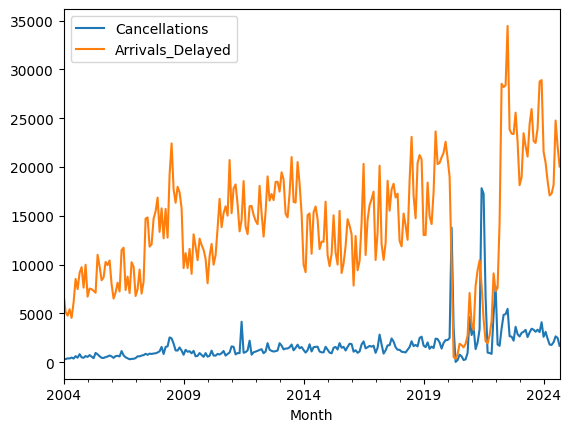

In [8]:
# plot the time series
flights_all_airlines_per_month.plot(y=["Cancellations", "Arrivals_Delayed"])

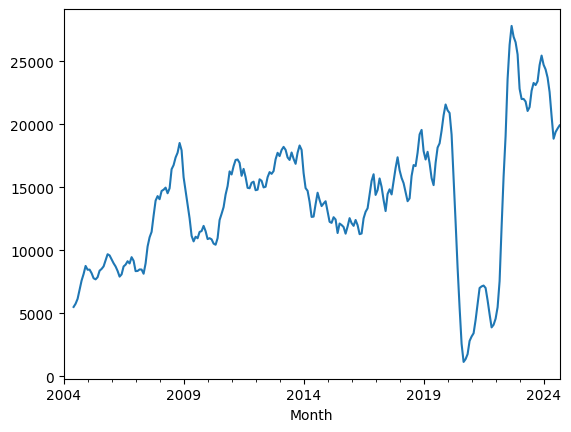

In [9]:
# find the moving average for a window of length 6
delays_moving_average = flights_all_airlines_per_month["Arrivals_Delayed"].rolling(window=6).mean().plot(kind="line")


<Axes: xlabel='Month'>

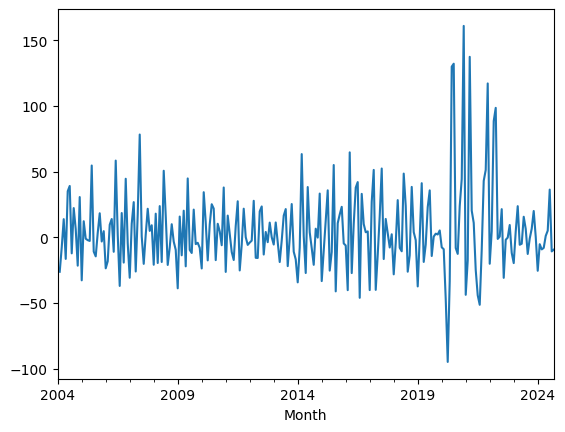

In [10]:
# find the percent change for the "Arrivals_Delayed" column
cancel_pct_change = flights_all_airlines_per_month["Arrivals_Delayed"].pct_change()*100

# plot the result
cancel_pct_change.plot(kind="line")

<Axes: xlabel='Month'>

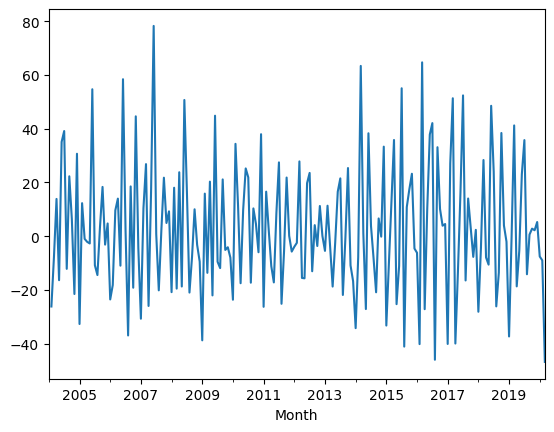

In [11]:
# Filter the Series from before March 2020
cancel_pct_change_filtered = cancel_pct_change[:"2020-03-01"]

# Get the sum of the Chelsea - Clinton values
cancel_pct_change_filtered.plot()

In [13]:
# filter the values in otp_per_month with a percent change greater than 50
flights_all_airlines_per_month[cancel_pct_change>50]

,Cancellations,Arrivals_Delayed,Sectors_Scheduled
Month,,,
2005-06-01,808.0,11009.0,60709.0
2006-06-01,1144.0,11492.0,63291.0
2007-06-01,861.0,14720.0,63865.0
2008-06-01,2543.0,19240.0,71459.0
2014-03-01,1230.0,15077.0,86346.0
2015-07-01,1958.0,15508.0,91548.0
2016-03-01,1226.0,12930.0,89549.0
2017-03-01,2835.0,20134.0,89219.0
2017-07-01,1724.0,18592.0,89022.0


<Axes: xlabel='Month'>

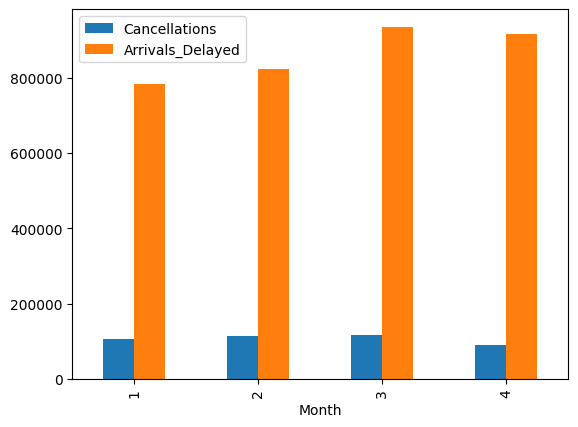

In [14]:
# Group the time series by quarter and plot the sum of its values
flights_all_airlines_per_month.groupby(flights_all_airlines_per_month.index.quarter).sum()[
    ["Cancellations", "Arrivals_Delayed"]].plot(kind="bar")

In [25]:
# before moving on, we will remove the aggregated data
flights = flights[(flights["Airline"]!="All Airlines") & (flights["Route"]!="All Ports-All Ports")]

flights.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
79,Adelaide-Brisbane,Adelaide,Brisbane,Qantas,2004-01-01,93.0,93,0.0,81.0,85.0,12.0,8.0,2004,1
80,Adelaide-Canberra,Adelaide,Canberra,Qantas,2004-01-01,48.0,48,0.0,45.0,45.0,3.0,3.0,2004,1
81,Adelaide-Gold Coast,Adelaide,Gold Coast,Qantas,2004-01-01,9.0,9,0.0,8.0,8.0,1.0,1.0,2004,1
82,Adelaide-Melbourne,Adelaide,Melbourne,Qantas,2004-01-01,352.0,350,2.0,317.0,325.0,33.0,25.0,2004,1
83,Adelaide-Perth,Adelaide,Perth,Qantas,2004-01-01,130.0,130,0.0,121.0,125.0,9.0,5.0,2004,1


## Cancellations by airline

Text(0, 0.5, 'Number of cancelled flights')

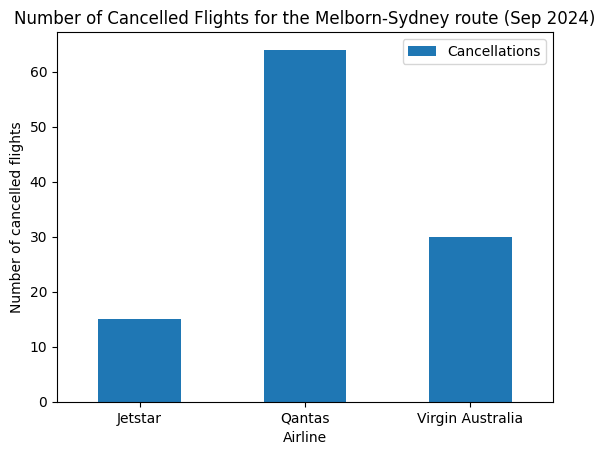

In [29]:
# Get the desired data - the route between Melborn and Sydney
import matplotlib.pyplot as plt

cancellation_mel_syd = flights[(flights["Route"]=="Melbourne-Sydney") & (flights["Month"]=="2024-09-01")]

# plot the column chart
cancellation_mel_syd.plot(kind="bar", x="Airline", y="Cancellations")

# add title
plt.title("Number of Cancelled Flights for the Melborn-Sydney route (Sep 2024)")
# rotate the xticks
plt.xticks(rotation=None)
# set the ylabel
plt.ylabel("Number of cancelled flights")

## Correlations

Correlation: 0.530327741261574


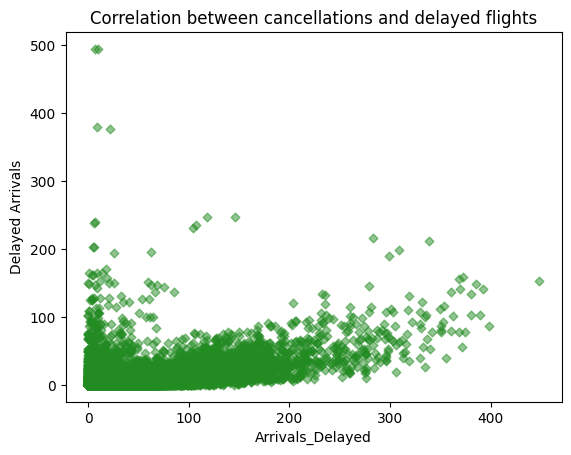

In [31]:
# create the scatter plot. Set the marker configuration
flights.plot(kind="scatter", x="Arrivals_Delayed", y="Cancellations", 
         color="forestgreen",
         marker="D", alpha=0.5)

# set the title
plt.title("Correlation between cancellations and delayed flights")

# change the Arrivals_Delayed label
plt.ylabel("Delayed Arrivals")

# print the correlation
print("Correlation:", flights.Cancellations.corr(flights["Arrivals_Delayed"]))

## Cancellations by route / Grouped column chart

In [32]:
flights.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
79,Adelaide-Brisbane,Adelaide,Brisbane,Qantas,2004-01-01,93.0,93,0.0,81.0,85.0,12.0,8.0,2004,1
80,Adelaide-Canberra,Adelaide,Canberra,Qantas,2004-01-01,48.0,48,0.0,45.0,45.0,3.0,3.0,2004,1
81,Adelaide-Gold Coast,Adelaide,Gold Coast,Qantas,2004-01-01,9.0,9,0.0,8.0,8.0,1.0,1.0,2004,1
82,Adelaide-Melbourne,Adelaide,Melbourne,Qantas,2004-01-01,352.0,350,2.0,317.0,325.0,33.0,25.0,2004,1
83,Adelaide-Perth,Adelaide,Perth,Qantas,2004-01-01,130.0,130,0.0,121.0,125.0,9.0,5.0,2004,1


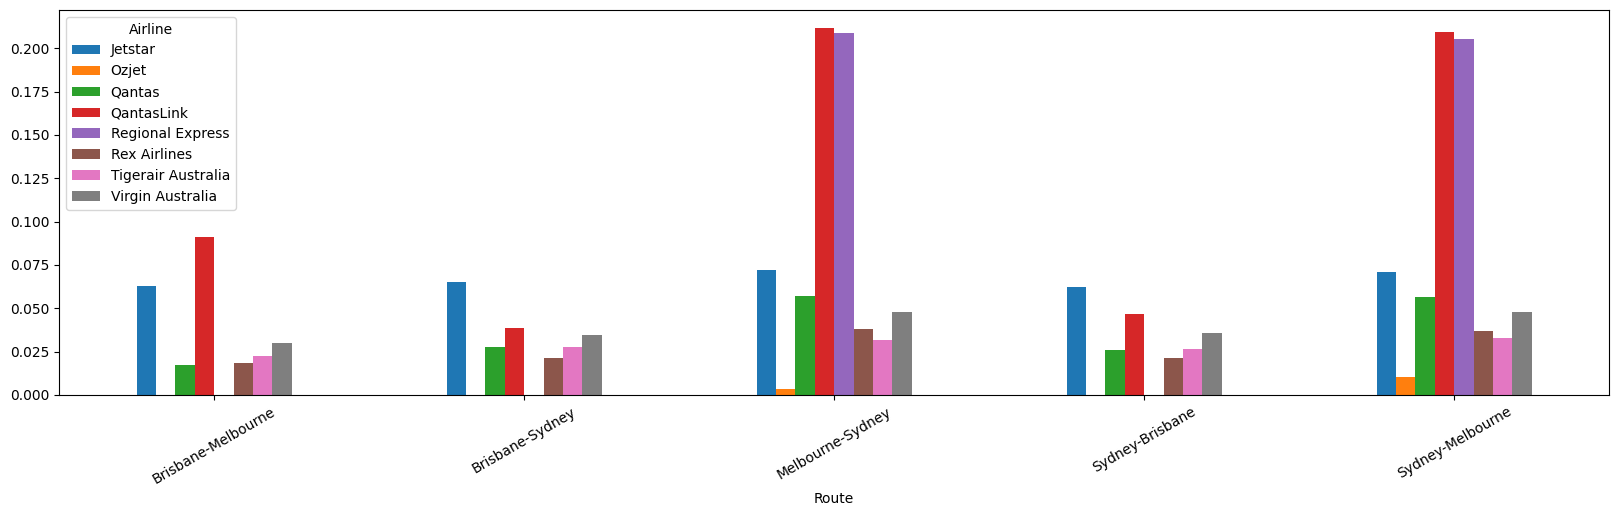

In [33]:
# find the top 5 routes
top5_routes = flights.groupby(by="Route")["Sectors_Flown"].sum(
               ).sort_values(ascending=False)[:5].index

# keep only the 5 most used routes
otp_top5_routes = flights[flights["Route"].isin(top5_routes)]

# group the filtered df and aggregate by sum
otp_top5_routes_grouped = otp_top5_routes.groupby(by=[ "Route", "Airline"]
                                                    )[["Cancellations", "Sectors_Scheduled"]].sum()

# find the proportion of cancelled flights
# (divide cancellations by the scheduled flights to keep the different volumes a more fair analysis)
otp_top5_routes_grouped["Cancellations"] = otp_top5_routes_grouped["Cancellations"]/otp_top5_routes_grouped["Sectors_Scheduled"]

# create the barplot for Cancellations
otp_top5_routes_grouped.unstack().plot(kind="bar", y="Cancellations", figsize=(20,5))

plt.xticks(rotation=30)
plt.show()